PREPROCESSING DATA

In [1]:
import pandas as pd

# Replace 'file.csv' with your CSV file path
df = pd.read_csv(r'C:\CYBERSECURITY\virtualenv\GUIDE_Train.csv')

# Display the first few rows of the dataframe
print(df.head())


              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersion  AntispamDirection  \
0  ... 

HANDLING MISSING DATA

In [2]:
# Calculate the proportion of missing values in each column
missing_proportion = df.isnull().mean()

# Identify columns where the proportion of missing values is greater than 10%
columns_to_drop = missing_proportion[missing_proportion > 0.10].index
print(columns_to_drop)

Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')


In [3]:

# Drop the columns identified as having more than 10% missing values
df = df.drop(columns=columns_to_drop)


In [4]:

print(df.isnull().sum())

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         51340
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64


In [5]:

distribution_counts = df['IncidentGrade'].value_counts()
print("Counts of each category in 'IncidentGrade':")
print(distribution_counts)


Counts of each category in 'IncidentGrade':
IncidentGrade
BenignPositive    4110817
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64


In [6]:
# Calculate the mode of the 'IncidentGrade' column
mode_grade = df['IncidentGrade'].mode()[0]

# Fill missing values with the mode and assign it back to the original column
df['IncidentGrade'] = df['IncidentGrade'].fillna(mode_grade)


FEATURE ENGINEERING:
CONVERTING TIMESTAMP COLUMN

In [7]:

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [8]:
# Extract year, month, day, hour, minute, second, and weekday
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second
df['Weekday'] = df['Timestamp'].dt.weekday  # Monday is 0 and Sunday is 6


In [12]:
# Take a random sample of 20 rows from the DataFrame
random_sample = df.sample(n=20, random_state=42)  # random_state ensures reproducibility
print(random_sample)


                    Id  OrgId  IncidentId  AlertId                 Timestamp  \
8036545   893353197938     64       49334   360163 2024-06-11 18:50:05+00:00   
3828916   987842478693     43       52272    14178 2024-06-09 08:02:17+00:00   
4404679   936302874005      2       21863    14266 2024-06-13 13:54:51+00:00   
8854100  1486058689361     37        3044     2411 2024-06-06 07:11:21+00:00   
7977240   128849019531     22         155   402605 2024-06-09 04:02:36+00:00   
4189759   670014901898    148          20    71278 2024-06-04 07:46:05+00:00   
7652546    60129543933      0          84   405332 2024-06-05 17:04:08+00:00   
5502079   627065227715   1310       12769    17846 2024-06-11 14:09:19+00:00   
4139729   549755815919     23         176  1283945 2024-06-05 19:05:34+00:00   
2662158   360777252869   1146       14003    28253 2024-06-09 00:35:34+00:00   
2817238   670014901925    100       16103    14374 2024-05-22 15:28:57+00:00   
5182480  1133871367943      0         21

In [9]:
df.shape

(9516837, 42)

OUTLIERS DETECTION:

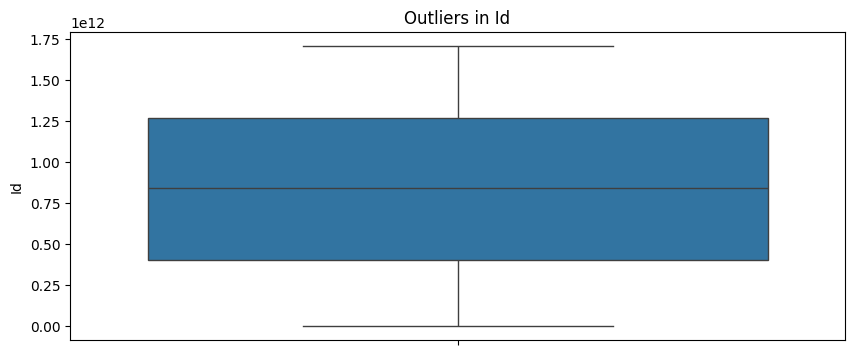

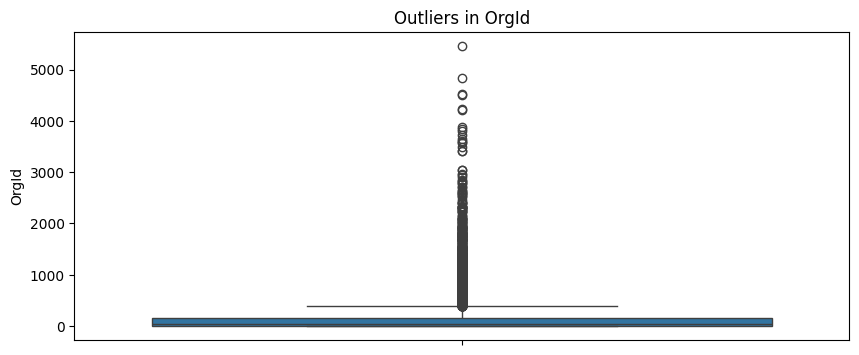

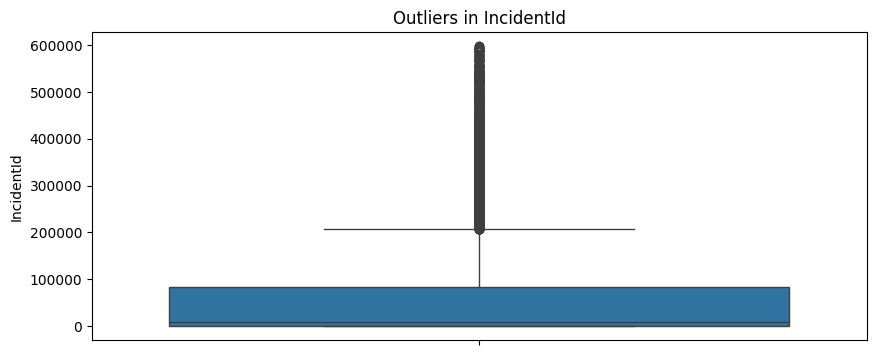

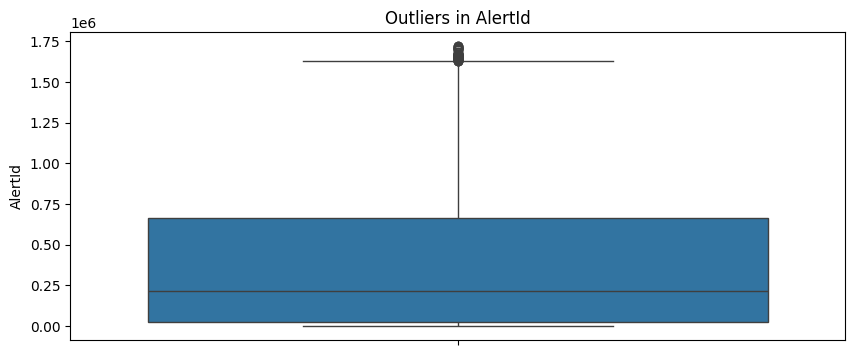

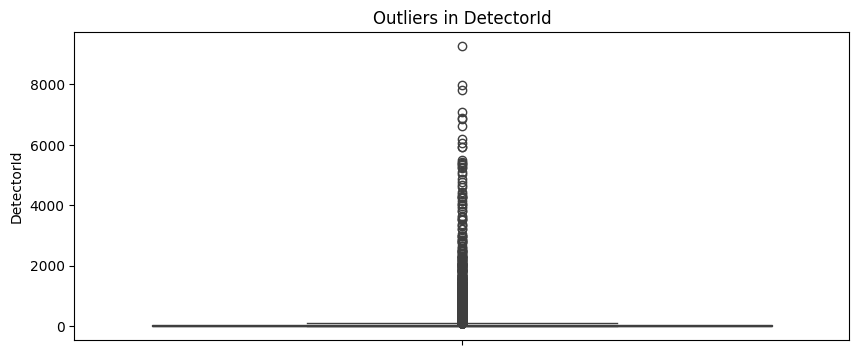

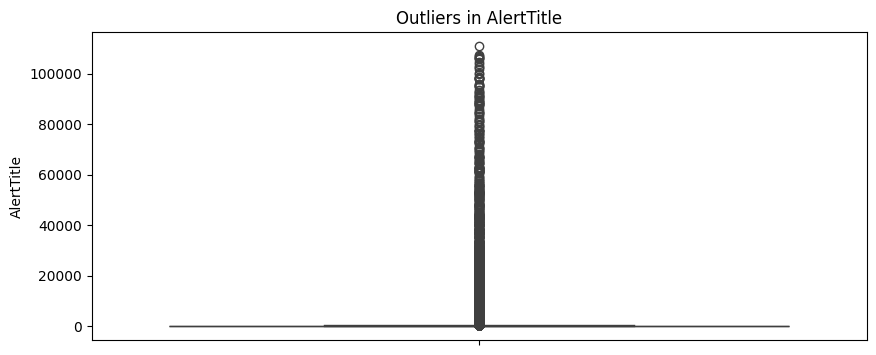

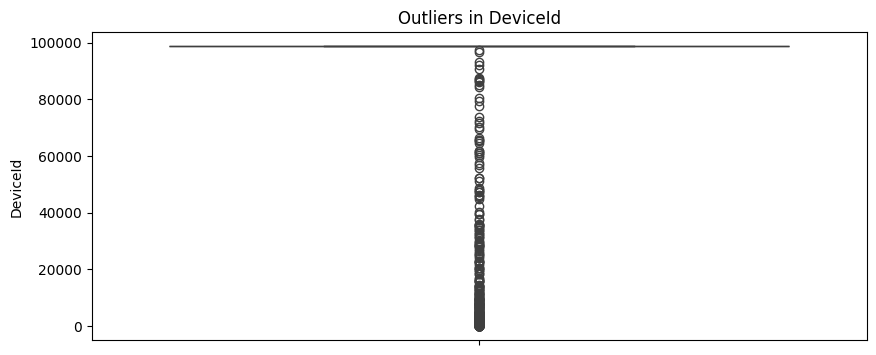

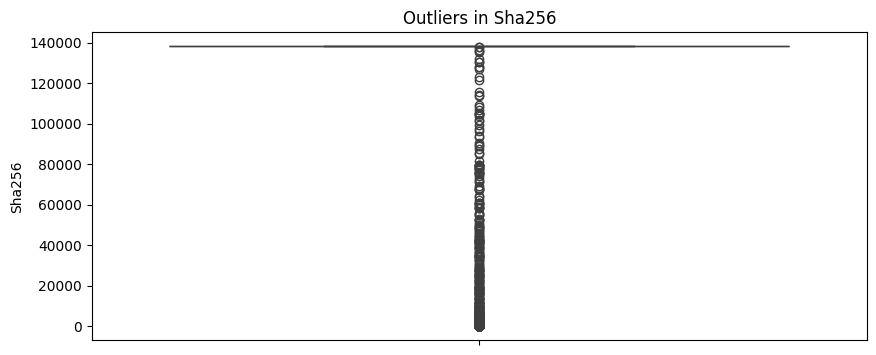

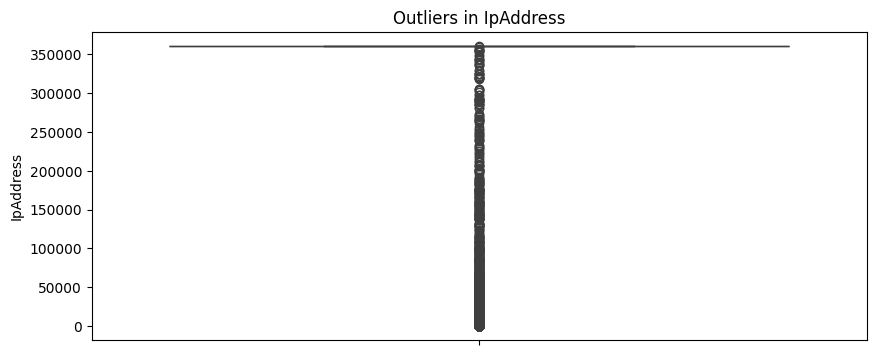

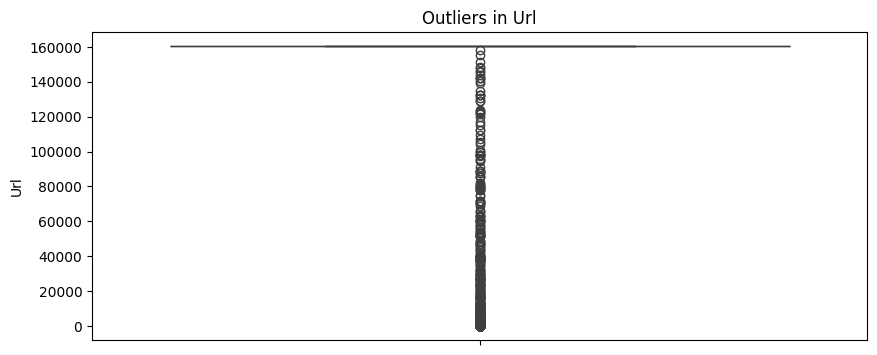

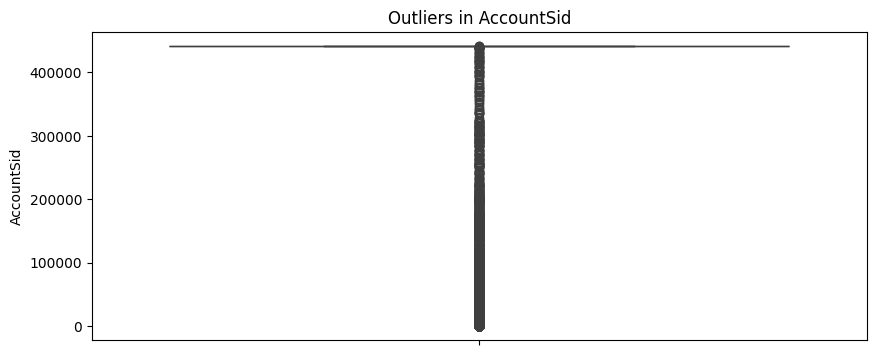

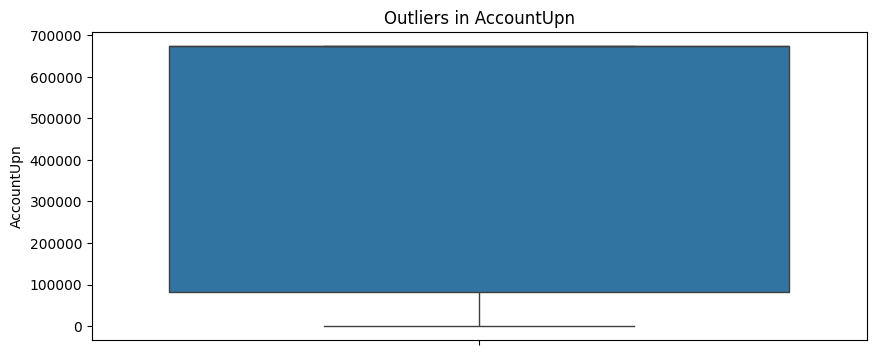

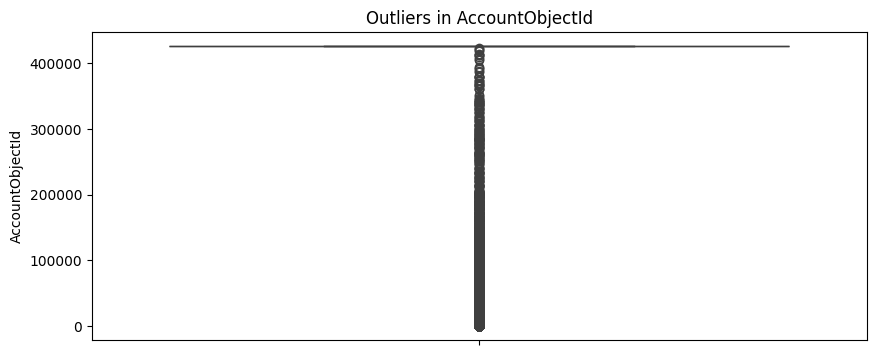

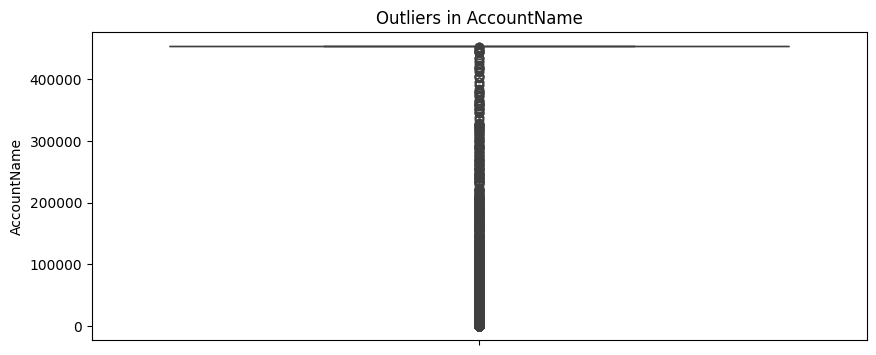

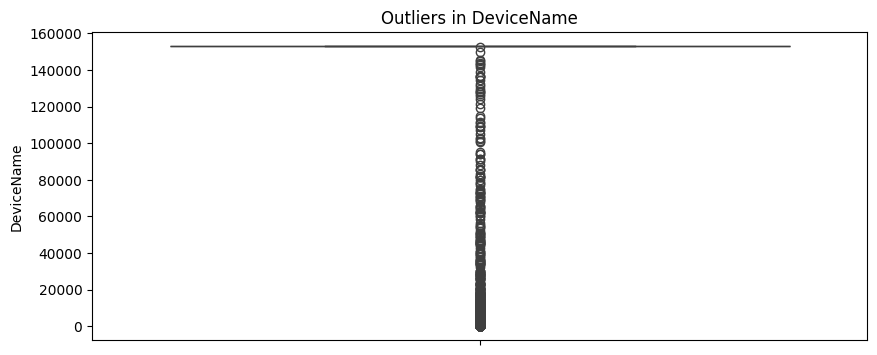

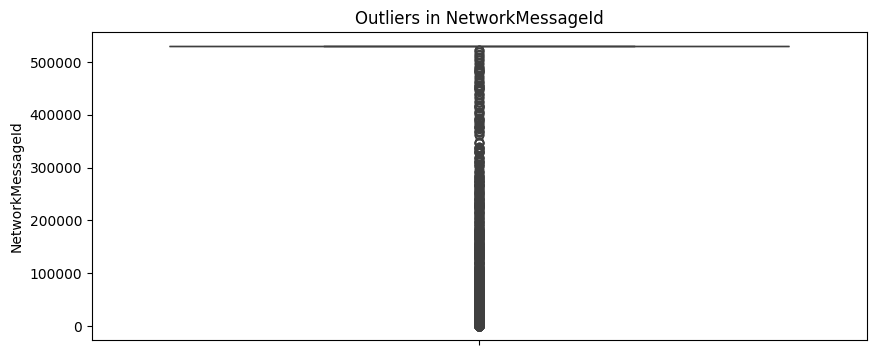

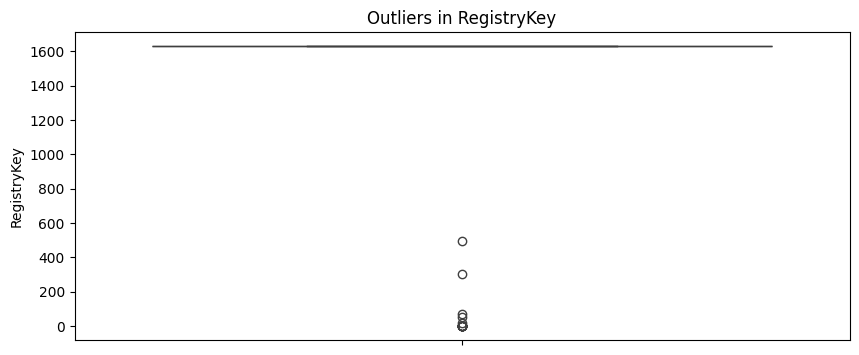

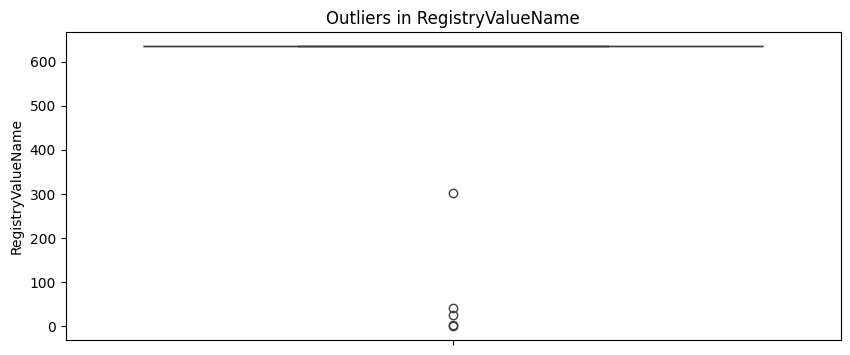

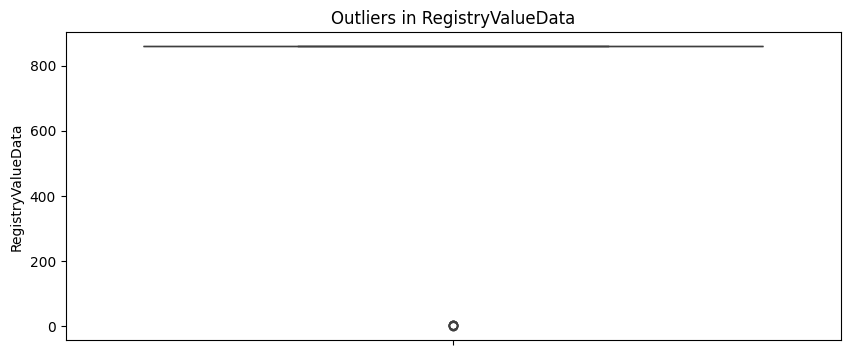

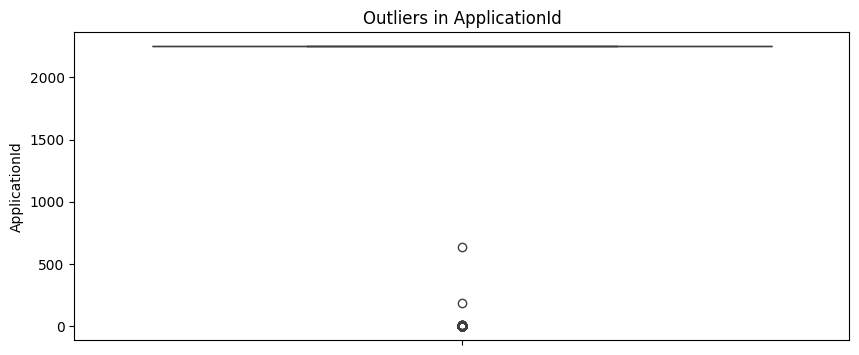

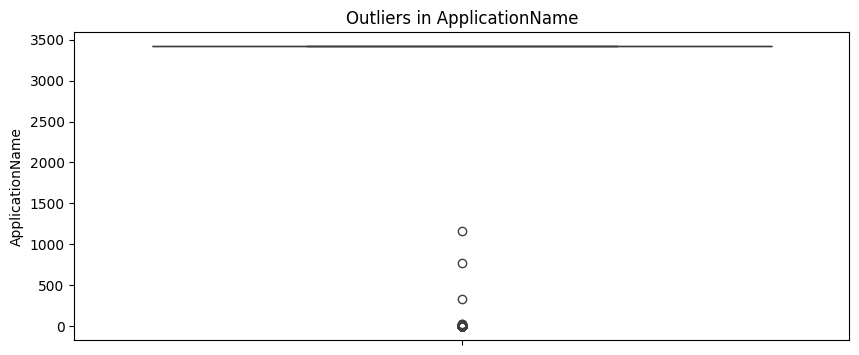

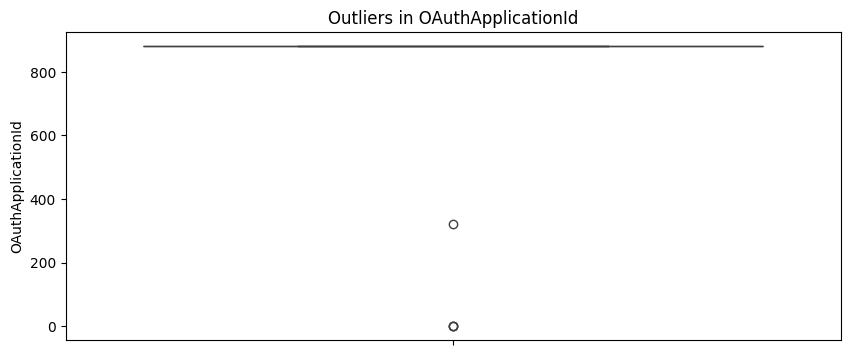

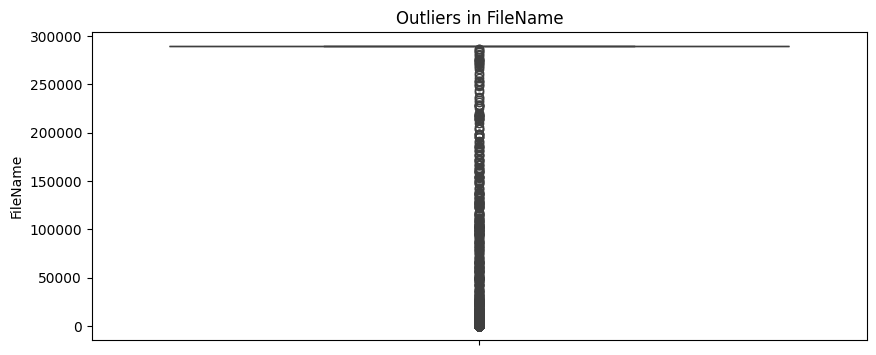

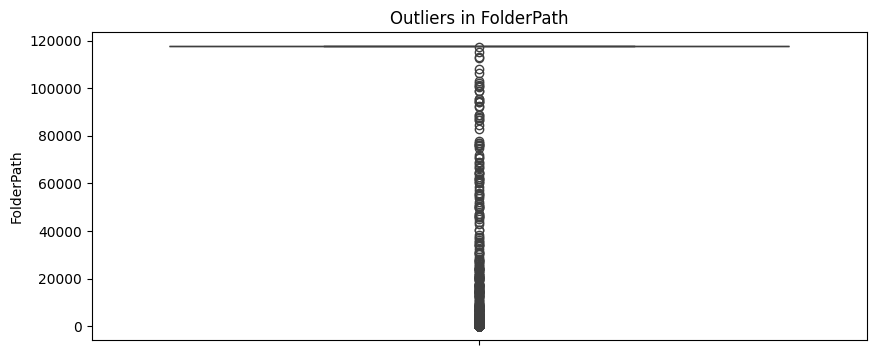

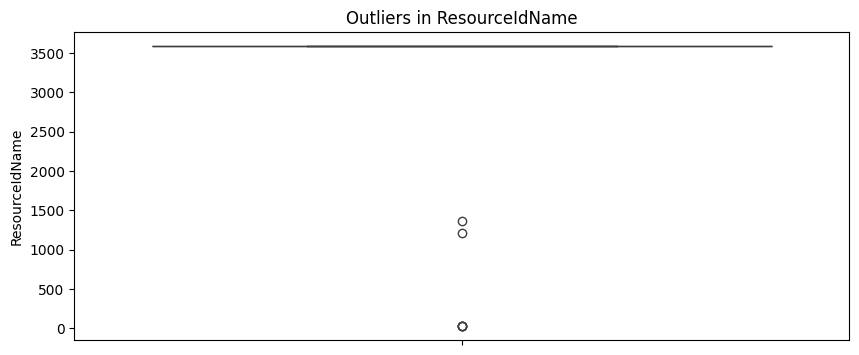

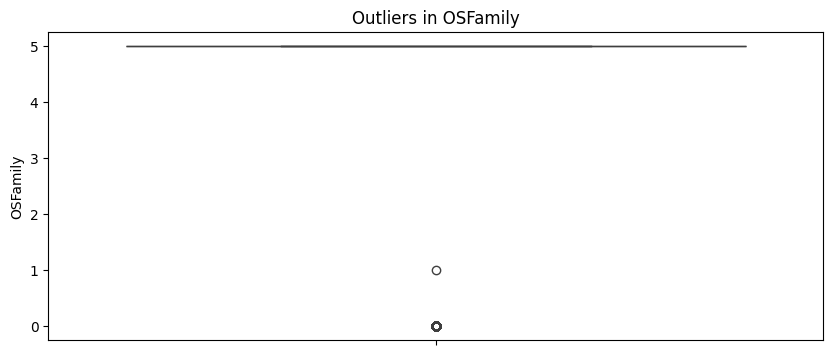

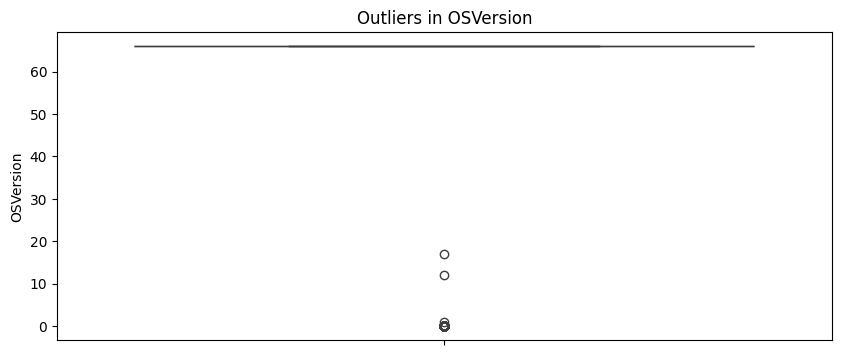

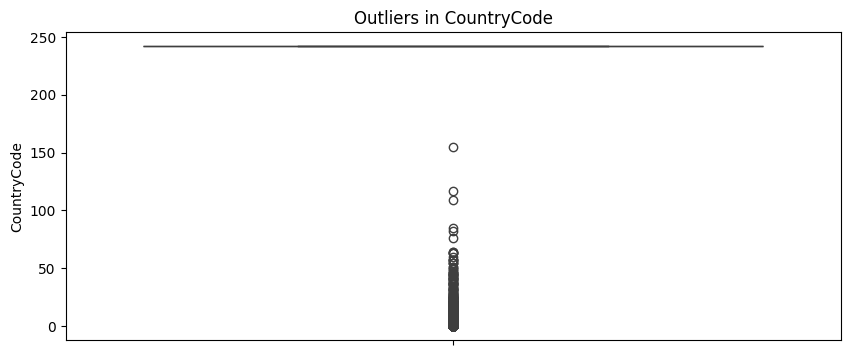

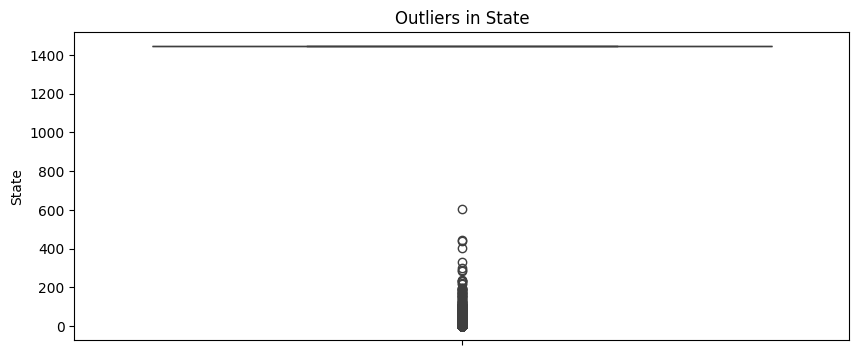

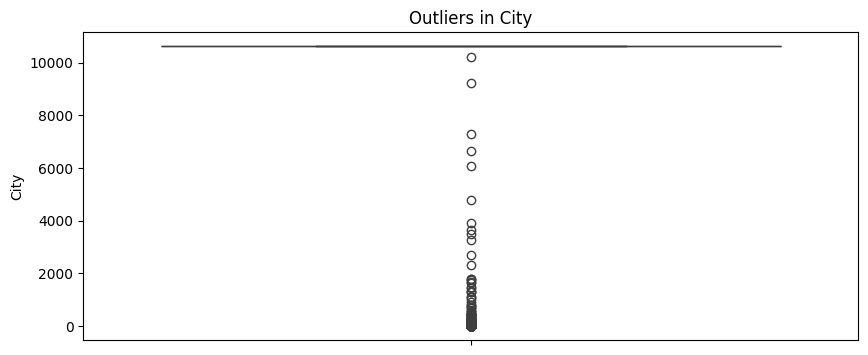

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize outliers using box plot
def visualize_outliers(df, columns, sample_size=10000):
    # Create a sample of the data to visualize quickly
    if len(df) > sample_size:
        df_sample = df.sample(n=sample_size, random_state=42)
    else:
        df_sample = df.copy()
    
    # Loop through the numeric columns and create box plots
    for column in columns:
        if pd.api.types.is_numeric_dtype(df_sample[column]):
            plt.figure(figsize=(10, 4))
            sns.boxplot(data=df_sample, y=column)
            plt.title(f'Outliers in {column}')
            plt.show()

# Specify the columns to visualize outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualize outliers for the specified numeric columns
visualize_outliers(df, numerical_columns)


In [13]:
# Select only columns with data types float and int
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Print the column names
print(numeric_columns)


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')


In [15]:
# Adjust the pandas display setting to show all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
df.head()


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour,Minute,Second,Weekday
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3,2024,6,4,6,5,15,1
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,14,3,1,25,4
2,1056561957389,809,58352,712507,2024-06-13 04:52:55+00:00,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,13,4,52,55,3
3,1279900258736,92,32992,774301,2024-06-10 16:39:36+00:00,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,10,16,39,36,0
4,214748368522,148,4359,188041,2024-06-15 01:08:07+00:00,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,2024,6,15,1,8,7,5


REMOVING EXTREME OUTLIERS USING IQR TECHNIQUES

In [17]:
import pandas as pd

# Function to detect and remove extreme outliers with a high IQR threshold for specific columns
def remove_extreme_outliers_selected_columns(df, columns, extreme_threshold=20):
    # Create a copy of the DataFrame to ensure original data is not affected
    df_cleaned = df.copy()
    
    # Loop through the specified columns to remove extreme outliers
    for column in columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[column]):  # Only process numeric columns
            Q1 = df_cleaned[column].quantile(0.25)
            Q3 = df_cleaned[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Use a high threshold for extreme outliers
            lower_bound = Q1 - extreme_threshold * IQR
            upper_bound = Q3 + extreme_threshold * IQR
            
            # Remove only extreme outliers from the specific columns
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned


# Replace 'Column1', 'Column2', etc. with actual column names from your DataFrame
specific_columns = [ 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion']  # Replace with actual columns

# Remove outliers from the specific columns using a very high threshold (e.g., 10x IQR)
df_cleaned = remove_extreme_outliers_selected_columns(df, specific_columns, extreme_threshold=10)

# Check how many rows were deleted
print(f"Original rows: {len(df)}, Cleaned rows: {len(df_cleaned)}")


Original rows: 9516837, Cleaned rows: 4984395


SAVING NECESSERY DATA IN CSV FILE FORMAT FOR FURTHER ANALYSIS

In [18]:
# Save the outliers-removed DataFrame to a CSV file
df_cleaned.to_csv('outliers_removed.csv', index=False)

# Save the original DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

print("DataFrames saved successfully!")


DataFrames saved successfully!
